In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split as tts

In [15]:
X,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20, random_state = 13)

In [16]:
X.shape, y.shape

((100, 1), (100,))

In [17]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=20)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

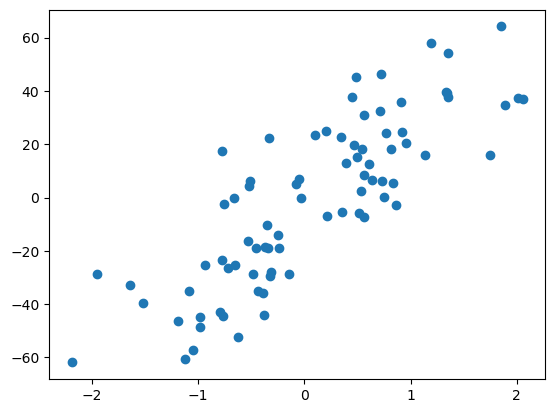

In [19]:
plt.scatter(X_train, y_train)
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
lr.coef_, lr.intercept_

(array([27.54116593]), np.float64(-3.3085050927445465))

C:\Users\Fazz Com 03364446969\anaconda3\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Fazz Com 03364446969\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Fazz Com 03364446969\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+04, tolerance: 7.528e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/Ridg

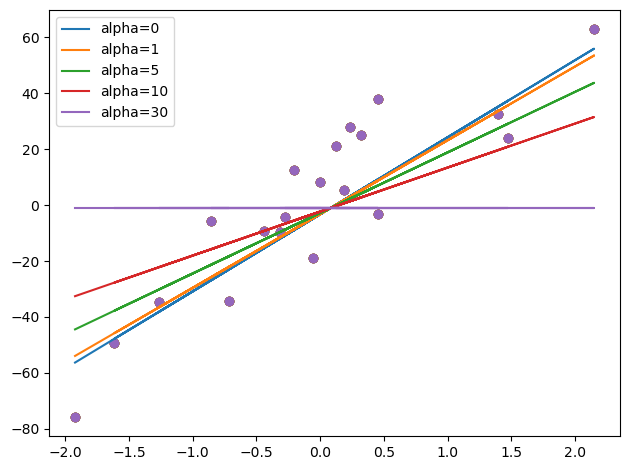

In [29]:
alpha = [0,1,5,10,30]
for i in alpha:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    #plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.plot(X_test, reg.predict(X_test), label = 'alpha={}'.format(i))
plt.tight_layout()
plt.legend()
plt.show()

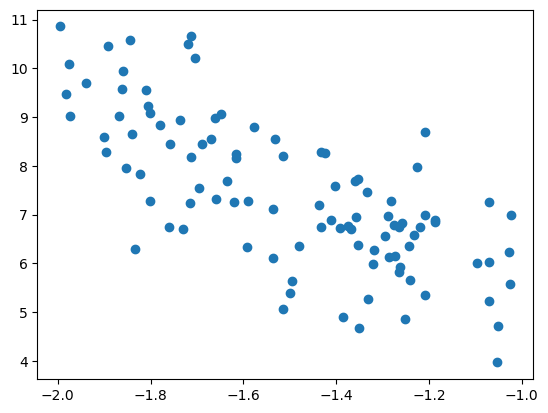

In [32]:
m = 100
X = np.random.rand(m,1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m,1)

plt.scatter(X, y)
plt.show()

C:\Users\Fazz Com 03364446969\anaconda3\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Fazz Com 03364446969\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Fazz Com 03364446969\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.365e+01, tolerance: 2.334e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/Ridg

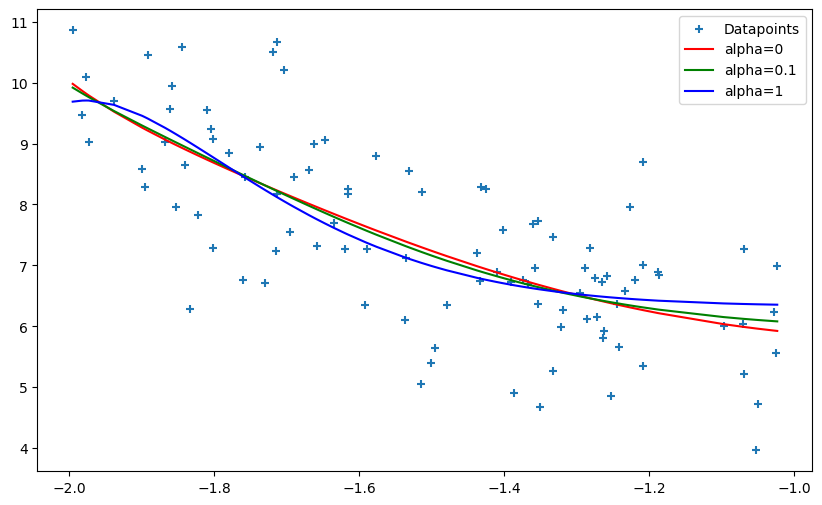

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_lasso(X, y, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso_reg', Lasso(alpha=alpha))
    ])
    model.fit(X,y)
    return model.predict(X)

alphas = [0,0.1,1]
colors = ['r','g','b']

plt.figure(figsize=(10,6))
plt.scatter(X, y, marker = '+', label='Datapoints')
for alpha, c in zip(alphas, colors):
    y_pred = get_preds_lasso(X, y, alpha)
    plt.plot(sorted(X[:,0]), y_pred[np.argsort(X[:,0])], color=c, label='alpha={}'.format(alpha))
plt.legend()
plt.show()